# ¿Cómo podemos controlar el creciente número de accidentes en Nueva York?

In [1]:
import json
#import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

#Para leer archivos: https://www.w3schools.com/python/pandas/ref_df_agg.asp

## Introduccion

**Contexto empresarial.** La ciudad de Nueva York ha experimentado un aumento en el número de accidentes en las carreteras de la ciudad. Quieren saber si el número de accidentes ha aumentado en las últimas semanas. Para todos los accidentes reportados, han recopilado detalles para cada accidente y han estado manteniendo registros durante el último año y medio (desde enero de 2018 hasta agosto de 2019).

La ciudad te ha contratado para que construyas visualizaciones que les ayuden a identificar patrones en accidentes, lo que les ayudaría a tomar acciones preventivas para reducir la cantidad de accidentes en el futuro. Tienen ciertos parámetros como municipio, hora del día, motivo del accidente, etc. De los que se preocupan y de los que les gustaría obtener información específica.

**Problema comercial.** Su tarea es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente, que se mencionan a continuación.

**Contexto analítico.** Se le proporciona un archivo CSV (almacenado en la carpeta ```datos``` ya creada) que contiene detalles sobre cada accidente, como fecha, hora, ubicación del accidente, motivo del accidente, tipos de vehículos involucrados, recuento de lesiones y muertes, etc. El delimitador en el archivo CSV dado es `;` en lugar del predeterminado `,`. Realizará las siguientes tareas con los datos:

1. Extraiga datos adicionales del municipio almacenados en un archivo JSON
2. Leer, transformar y preparar datos para su visualización
3. Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos.
        
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:

1. ¿Cómo ha fluctuado el número de accidentes durante el último año y medio? ¿Han aumentado con el tiempo?
2. Para un día en particular, ¿durante qué horas es más probable que ocurran accidentes?
3. ¿Hay más accidentes entre semana que durante los fines de semana?
4. ¿Cuál es la proporción de recuento de accidentes por área por municipio? ¿Qué distritos tienen un número desproporcionadamente grande de accidentes para su tamaño?
5. Para cada municipio, ¿durante qué horas es más probable que ocurran accidentes?
6. ¿Cuáles son las 5 principales causas de accidentes en la ciudad?
7. ¿Qué tipos de vehículos están más involucrados en accidentes por municipio?
8. ¿Qué tipos de vehículos están más involucrados en las muertes?

## Obteniendo los datos relevantes

El cliente ha solicitado un análisis de la relación accidentes-área de los distritos. Los datos del municipio se almacenan en un archivo JSON en la carpeta ```datos```.

### Question (5 min):

Utilice la función ```json.load()``` para cargar el archivo ```borough_data.json``` como diccionario.

**Answer.** 

In [2]:
with open('borough_data.json') as f:
    borough_data=json.load(f)
    
borough_data

{'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island',
  'population': 479458.0,
  'area': 58.37}}

In [3]:
type(borough_data)

dict

### Question (5 min):
De manera similar, use la función pandas ```read_csv()``` para cargar el archivo ```accidentes.csv``` como un DataFrame. Nombra este DataFrame ```df```.


**Answer.** 

In [4]:
with open('accidents.csv') as f:
    df=pd.read_csv(f, delimiter=';')

In [5]:
df.head()#Para visualizar los primeros 5 registros

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


In [6]:
df.tail()#ver los últimos 5 registros

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
238517,01/20/2018,15:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,...,Unspecified,NaN,NaN,NaN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
238518,01/04/2018,14:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,...,NaN,NaN,NaN,NaN,3822315,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
238519,01/20/2018,13:05,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
238520,01/29/2018,17:45,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
238521,01/23/2018,16:38,BROOKLYN,11211.0,40.710197,-73.958430,HAVEMEYER STREET,0,0,0,...,Passing or Lane Usage Improper,NaN,NaN,NaN,3833631,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN


In [7]:
df.sample(5)#Trae registros de manera aleatoria. Sólo da un registro pseudoaleatorio por defecto

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
93530,03/28/2019,7:55,BROOKLYN,11236.0,40.639275,-73.907460,FLATLANDS AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,4105784,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
15731,07/16/2019,4:30,QUEENS,11379.0,40.712204,-73.886380,69 STREET,0,0,0,...,NaN,NaN,NaN,NaN,4171101,Sedan,NaN,NaN,NaN,NaN
109039,03/06/2019,10:25,QUEENS,11004.0,40.744026,-73.717636,UNION TURNPIKE,0,0,0,...,Unspecified,NaN,NaN,NaN,4093141,Sedan,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
182585,05/03/2018,9:50,QUEENS,11377.0,40.735550,-73.894226,51 AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3894043,CONV,PASSENGER VEHICLE,NaN,NaN,NaN
63421,05/27/2019,22:40,BROOKLYN,11201.0,40.698376,-73.983055,GOLD STREET,0,0,0,...,Unspecified,NaN,NaN,NaN,4140535,Sedan,Sedan,NaN,NaN,NaN


## Overview de la data

Analizemos las columnas presentes en el data frame

In [8]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [9]:
list(df.columns) #convertir el dataframe en lista

['DATE',
 'TIME',
 'BOROUGH',
 'ZIP CODE',
 'LATITUDE',
 'LONGITUDE',
 'ON STREET NAME',
 'NUMBER OF PEDESTRIANS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST INJURED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED',
 'CONTRIBUTING FACTOR VEHICLE 1',
 'CONTRIBUTING FACTOR VEHICLE 2',
 'CONTRIBUTING FACTOR VEHICLE 3',
 'CONTRIBUTING FACTOR VEHICLE 4',
 'CONTRIBUTING FACTOR VEHICLE 5',
 'COLLISION_ID',
 'VEHICLE TYPE CODE 1',
 'VEHICLE TYPE CODE 2',
 'VEHICLE TYPE CODE 3',
 'VEHICLE TYPE CODE 4',
 'VEHICLE TYPE CODE 5']

In [10]:
df.info()#Permite conocer los datos que tienen las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATE                           238522 non-null  object 
 1   TIME                           238522 non-null  object 
 2   BOROUGH                        238522 non-null  object 
 3   ZIP CODE                       238452 non-null  float64
 4   LATITUDE                       231544 non-null  float64
 5   LONGITUDE                      231544 non-null  float64
 6   ON STREET NAME                 153918 non-null  object 
 7   NUMBER OF PEDESTRIANS INJURED  238522 non-null  int64  
 8   NUMBER OF PEDESTRIANS KILLED   238522 non-null  int64  
 9   NUMBER OF CYCLIST INJURED      238522 non-null  int64  
 10  NUMBER OF CYCLIST KILLED       238522 non-null  int64  
 11  NUMBER OF MOTORIST INJURED     238522 non-null  int64  
 12  NUMBER OF MOTORIST KILLED     

In [11]:
df.describe()

,ZIP CODE,LATITUDE,LONGITUDE,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID
count,238452.000000,231544.000000,231544.000000,238522.000000,238522.000000,238522.000000,238522.000000,238522.000000,238522.000000,2.385220e+05
mean,10865.578838,40.656873,-73.797699,0.054523,0.000532,0.023482,0.000084,0.178076,0.000310,4.008044e+06
std,546.056571,1.632850,2.961521,0.237834,0.023250,0.152835,0.009157,0.587479,0.017848,1.084693e+05
min,10000.000000,0.000000,-74.253930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.511951e+06
25%,10452.000000,40.666750,-73.973860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.913739e+06
50%,11208.000000,40.717007,-73.922770,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.006476e+06
75%,11354.000000,40.765715,-73.864890,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.102648e+06
max,11697.000000,40.912884,0.000000,6.000000,2.000000,3.000000,1.000000,21.000000,2.000000,4.195347e+06


Tenemos las siguientes columnas

1. **BOROUGH**: el municipio en el que ocurrió el accidente
2. **COLLISION_ID**: un identificador único para esta colisión
3. **CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)**: Motivos del accidente
4. **CROSS STREET NAME**: Calle transversal más cercana al lugar del accidente
5. **DATE**: Fecha del accidente
6. **TIME**: Hora del accidente
7. **LATITUDE**: Latitud del accidente
8. **LONGITUDE**: Longitud del accidente
9. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED**: Lesión por categoría
10. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) DEATHS**: Categoría muerte sabia
11. **ON STREET NAME**: Calle donde ocurrió el accidente
13. **VEHICLE TYPE CODE(1, 2, 3, 4, 5)**: Tipos de vehículos involucrados en el accidente
14. **ZIP CODE**: código postal del lugar del accidente

### Exercise 1 (30 min):

Desde 2014, la ciudad de Nueva York ha estado implementando un plan de seguridad vial llamado [Vision Zero](https://www1.nyc.gov/content/visionzero/pages/). Su objetivo es reducir el número de muertes por accidentes de tránsito a *cero* para fines de 2024. El plan está creando nuevas y mejorando las medidas de seguridad actuales, algunas de ellas incluyen:

- [ ] Detección de peatones automatizada
- [ ] Auditorías de seguridad vial en lugares de alto riesgo
- [ ] Ampliación de la red de carriles bici
- [ ] Iniciativas específicas de educación y sensibilización
- [ ] Creación de islas de refugio peatonal
- [ ] Lanzamiento del programa integrado de reductor de velocidad basado en datos (topes y amortiguadores de velocidad)

¿Cuáles de estas iniciativas podrían beneficiarse directamente de un análisis de los datos proporcionados? Marque todo lo que corresponda.

**Nota:** Puede crear marcas de verificación haciendo doble clic en esta celda y agregando una ```[x]``` en las líneas correspondientes.

**Answer.**

- [ ] Detecciòn de peatones automatizada
- [X] Auditorías de seguridadvial en lugares de alto riesgo
- [X] Ampliación de la red de carriles bici
- [ ] Iniciativas especificas de educación y sensibilización
- [ ] Creación de islas de refugio peatonal
- [ ] Lanzamiento del programa integrado de reductor de velocidad en datos (topes y amortiguadores de velocidad)


Sigamos adelante y respondamos a cada una de las preguntas del cliente.

## Respondiendo las preguntas del cliente 

### Exercise 2 (30 min):

Agrupe los datos disponibles mensualmente y genere un line plot de accidentes a lo largo del tiempo. ¿Ha aumentado el número de accidentes durante el último año y medio?

**Sugerencia**: Puede encontrar útiles las funciones de pandas ```to_datetime ()``` y ```dt.to_period ()```.

**Answer.** 

In [12]:
df['DATE'] = pd.to_datetime(df.DATE)
df['DATE']

0        2018-09-26
1        2018-09-25
2        2019-08-22
3        2018-09-23
4        2019-08-20
            ...    
238517   2018-01-20
238518   2018-01-04
238519   2018-01-20
238520   2018-01-29
238521   2018-01-23
Name: DATE, Length: 238522, dtype: datetime64[ns]

In [13]:
df.info()#Ahora DATE es tipo datos de tiempo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATE                           238522 non-null  datetime64[ns]
 1   TIME                           238522 non-null  object        
 2   BOROUGH                        238522 non-null  object        
 3   ZIP CODE                       238452 non-null  float64       
 4   LATITUDE                       231544 non-null  float64       
 5   LONGITUDE                      231544 non-null  float64       
 6   ON STREET NAME                 153918 non-null  object        
 7   NUMBER OF PEDESTRIANS INJURED  238522 non-null  int64         
 8   NUMBER OF PEDESTRIANS KILLED   238522 non-null  int64         
 9   NUMBER OF CYCLIST INJURED      238522 non-null  int64         
 10  NUMBER OF CYCLIST KILLED       238522 non-null  int64         
 11  

In [14]:
accidentes_mensuales=df.groupby(df["DATE"].dt.to_period("M")).size()
accidentes_mensuales

DATE
2018-01    11735
2018-02    10395
2018-03    12519
2018-04    11679
2018-05    13438
2018-06    13314
2018-07    12787
2018-08    12644
2018-09    12425
2018-10    13336
2018-11    12447
2018-12    12479
2019-01    11000
2019-02    10310
2019-03    11482
2019-04    10833
2019-05    12642
2019-06    12577
2019-07    12014
2019-08     8466
Freq: M, dtype: int64

In [15]:
accidentes_mensuales2=df.groupby(df["DATE"].dt.to_period("M")).count()
accidentes_mensuales2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
DATE,,,,,,,,,,,,,,,,,,,,,
2018-01,11735,11735,11735,11732,11438,11438,7754,11735,11735,11735,...,9575,612,115,35,11735,11633,8520,553,107,35
2018-02,10395,10395,10395,10393,10109,10109,6865,10395,10395,10395,...,8556,561,133,45,10395,10286,7657,518,123,44
2018-03,12519,12519,12519,12515,12165,12165,8080,12519,12519,12519,...,10345,632,131,30,12519,12430,9302,582,128,28
2018-04,11679,11679,11679,11677,11300,11300,7555,11679,11679,11679,...,9797,610,146,45,11679,11608,8777,560,136,42
2018-05,13438,13438,13438,13433,12974,12974,8705,13438,13438,13438,...,11385,729,155,39,13438,13360,10515,696,147,34


In [16]:
accidentes_mensuales.head()

DATE
2018-01    11735
2018-02    10395
2018-03    12519
2018-04    11679
2018-05    13438
Freq: M, dtype: int64

<AxesSubplot:xlabel='DATE'>

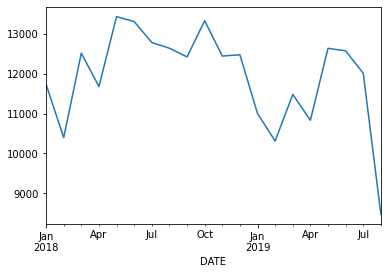

In [17]:
accidentes_mensuales.plot.line()

<AxesSubplot:xlabel='DATE'>

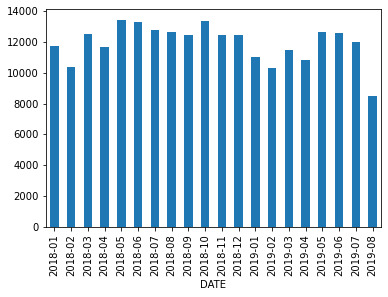

In [18]:
accidentes_mensuales.plot.bar()

<AxesSubplot:xlabel='DATE'>

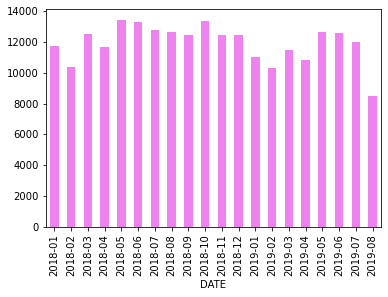

In [19]:
accidentes_mensuales.plot.bar(color="violet")#Cambiar código de color

In [20]:
accidentes_mensuales2=df.groupby(df["DATE"].dt.to_period("d")).size()
accidentes_mensuales2

DATE
2018-01-01    301
2018-01-02    422
2018-01-03    419
2018-01-04    292
2018-01-05    483
             ... 
2019-08-20    360
2019-08-21    333
2019-08-22    333
2019-08-23    311
2019-08-24    281
Freq: D, Length: 601, dtype: int64

<AxesSubplot:xlabel='DATE'>

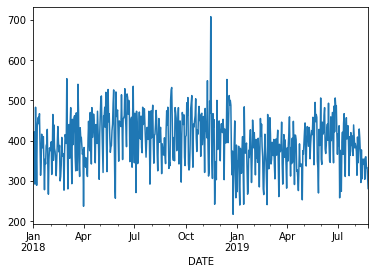

In [21]:
accidentes_mensuales2.plot.line()

### Exercise 3 (15 min):

De la gráfica anterior, ¿qué meses parecen tener el menor número de accidentes? ¿Cuáles crees que son las razones detrás de esto?

**Answer.** 


In [22]:
accidentes_mensuales.mean()

11926.1

In [23]:
accidentes_mensuales.index

PeriodIndex(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
             '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08'],
            dtype='period[M]', name='DATE', freq='M')

In [24]:
accidentes_mensuales

DATE
2018-01    11735
2018-02    10395
2018-03    12519
2018-04    11679
2018-05    13438
2018-06    13314
2018-07    12787
2018-08    12644
2018-09    12425
2018-10    13336
2018-11    12447
2018-12    12479
2019-01    11000
2019-02    10310
2019-03    11482
2019-04    10833
2019-05    12642
2019-06    12577
2019-07    12014
2019-08     8466
Freq: M, dtype: int64

In [25]:
accidentes_mensuales[0]

11735

In [26]:
print(accidentes_mensuales.index)

PeriodIndex(['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
             '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12',
             '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
             '2019-07', '2019-08'],
            dtype='period[M]', name='DATE', freq='M')


In [27]:
#Meses con menores números de accidentes
accidentes_mensuales[accidentes_mensuales<accidentes_mensuales.mean()]

DATE
2018-01    11735
2018-02    10395
2018-04    11679
2019-01    11000
2019-02    10310
2019-03    11482
2019-04    10833
2019-08     8466
Freq: M, dtype: int64

Los meses con menores accidentes fueron Enero, febrero, abril del 2018
Enero, febrero marzo abril y agosto del 2019

### Exercise 4 (30 min):
¿Cómo varía el número de accidentes a lo largo de un solo día? Cree una nueva columna `HOUR` basada en los datos de la columna `TIME`, luego trace un gráfico de barras de la distribución por hora a lo largo del día.

**Sugerencia:** Puede encontrar útil la función ```dt.hour```.

**Answer.**

In [28]:
df['TIME'] = pd.to_datetime(df['TIME'])
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,2018-09-26,2021-08-11 12:12:00,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,2018-09-25,2021-08-11 16:30:00,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,2019-08-22,2021-08-11 19:30:00,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,2018-09-23,2021-08-11 13:10:00,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,2019-08-20,2021-08-11 22:40:00,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


In [29]:
df["HOUR"]=df['TIME'].dt.time
df["TIME"]

0        2021-08-11 12:12:00
1        2021-08-11 16:30:00
2        2021-08-11 19:30:00
3        2021-08-11 13:10:00
4        2021-08-11 22:40:00
                 ...        
238517   2021-08-11 15:00:00
238518   2021-08-11 14:00:00
238519   2021-08-11 13:05:00
238520   2021-08-11 17:45:00
238521   2021-08-11 16:38:00
Name: TIME, Length: 238522, dtype: datetime64[ns]

In [30]:
df['HOUR'] = df["TIME"].dt.hour ##Se usa para extraer únicamente la hora
df.HOUR

0         12
1         16
2         19
3         13
4         22
          ..
238517    15
238518    14
238519    13
238520    17
238521    16
Name: HOUR, Length: 238522, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238522 entries, 0 to 238521
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATE                           238522 non-null  datetime64[ns]
 1   TIME                           238522 non-null  datetime64[ns]
 2   BOROUGH                        238522 non-null  object        
 3   ZIP CODE                       238452 non-null  float64       
 4   LATITUDE                       231544 non-null  float64       
 5   LONGITUDE                      231544 non-null  float64       
 6   ON STREET NAME                 153918 non-null  object        
 7   NUMBER OF PEDESTRIANS INJURED  238522 non-null  int64         
 8   NUMBER OF PEDESTRIANS KILLED   238522 non-null  int64         
 9   NUMBER OF CYCLIST INJURED      238522 non-null  int64         
 10  NUMBER OF CYCLIST KILLED       238522 non-null  int64         
 11  

In [32]:
accidentes_mensuales_hora=(df.groupby("HOUR").agg(accidentes=("HOUR", "count")))
accidentes_mensuales_hora

,accidentes
HOUR,
0,8160
1,3460
2,2570
3,2302
4,2562
5,2878
6,4844
7,7399
8,13403


<AxesSubplot:xlabel='HOUR'>

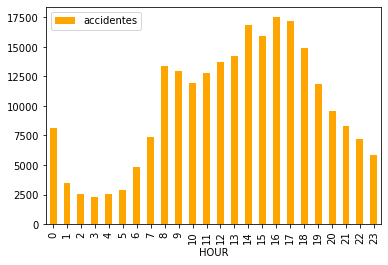

In [33]:
accidentes_mensuales_hora.plot.bar(color="orange")

La mayor cantidad de accidentes se encuentra desde las 14 horas hasta las 17 horas. Quizás cuando la gente se regresa hacia sus casas?

### Exercise 5 (15 min):

En la pregunta anterior hemos agregado el número de accidentes por hora sin tener en cuenta la fecha y el lugar en que ocurrieron. ¿Qué crítica le daría a este enfoque?

**Answer.** 


No se puede establecer cuál es la relación de accidentalidad con respecto al lugar ni la fecha del accidente. Por ejemplo, saber cuáles lugares son los más accidentados, o si hay fechas de mucho tránsito que potencien estos accidentes, o por qué hay fechas donde la accidentalidad es baja y así poder ofrecer mejores estrategias.

### Exercise 6 (15 min):

¿Cómo varía el número de accidentes en una sola semana? Trace un gráfico de barras basado en el recuento de accidentes por día de la semana.

**Sugerencia:** Puede encontrar útil la función ```dt.weekday```.

**Answer.**

In [34]:
df['WEEK'] = df["DATE"].dt.weekday
df.WEEK

0         2
1         1
2         3
3         6
4         1
         ..
238517    5
238518    3
238519    5
238520    0
238521    1
Name: WEEK, Length: 238522, dtype: int64

<AxesSubplot:xlabel='WEEK'>

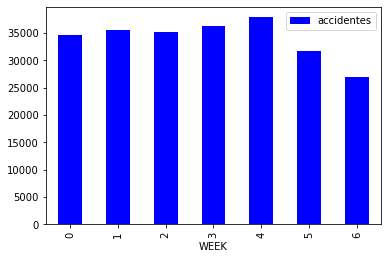

In [35]:
accidentes_semana=df.groupby("WEEK").agg(accidentes=("WEEK",'count'))
accidentes_semana.plot.bar(color ="blue") 

De acuerdo a la gráfica, el día de la semana con mayor probabilidad de accidentalidad son los viernes.

### Exercise 7 (30 min):

Trace una gráfica de barras del número total de accidentes en cada municipio, así como uno de los accidentes por milla cuadrada por municipio. ¿Qué puedes concluir?

**Sugerencia:** Es posible que desee actualizar algunas de las claves en el diccionario del municipio para que coincidan con los nombres en el marco de datos.

**Answer.**

In [36]:
accidentes_municipio=df.groupby("BOROUGH").agg(accidentes=("BOROUGH","count"))
accidentes_municipio

,accidentes
BOROUGH,
BRONX,37709
BROOKLYN,76253
MANHATTAN,48749
QUEENS,67120
STATEN ISLAND,8691


Se empieza a analizar accidentes por municipio, y se encuentra que el lugar con menor accidentalidad es Staten Island

<AxesSubplot:ylabel='BOROUGH'>

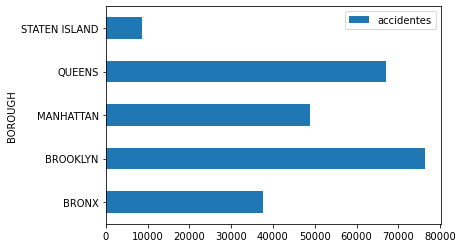

In [37]:
accidentes_municipio.plot.barh()

Ahora se analizará por ZIP CODE

In [38]:
accidentes_municipio=df.groupby("ZIP CODE").agg(accidentes=("ZIP CODE", "count"))
accidentes_municipio

,accidentes
ZIP CODE,
10000.0,103
10001.0,2651
10002.0,2493
10003.0,1435
10004.0,421
...,...
11691.0,1235
11692.0,338
11693.0,299


A continuación, se asocia el municipio por el zip code

In [39]:
df3 =pd.DataFrame({"count": df.groupby(["BOROUGH", "ZIP CODE"]).size()})
df3

count
BOROUGH       ZIP CODE       
BRONX         10451.0    2001
              10452.0    1265
              10453.0    1509
              10454.0    1680
              10455.0    1505
...                       ...
STATEN ISLAND 10308.0     492
              10309.0     637
              10310.0     714
              10312.0    1128
              10314.0     462

[224 rows x 1 columns]

In [40]:
accidentalidad_min=df3.loc[df3["count"].idxmin()]
accidentalidad_min

count    1
Name: (MANHATTAN, 10045.0), dtype: int64

In [42]:
df3.loc[df3["ZIP CODE"]=10045]

SyntaxError: invalid syntax (<ipython-input-42-3a941a219ce9>, line 1)

In [43]:
accidentalidad_min=df3.loc[df3["count"].idxmax()]
accidentalidad_min

count    4495
Name: (BROOKLYN, 11207.0), dtype: int64

### Exercise 8 (30 min):

¿Qué horas tienen más accidentes en cada municipio? Trace un gráfico de barras para cada municipio que muestre el número de accidentes por cada hora del día.

**Sugerencia:** Puede usar ```sns.FacetGrid``` para crear una cuadrícula de parcelas con los datos por hora de cada municipio.

**Answer.**

In [44]:
import seaborn as sns

In [45]:
df1=pd.DataFrame({"count":df.groupby(["BOROUGH","HOUR"]).size()})
df1

count
BOROUGH       HOUR       
BRONX         0      1329
              1       529
              2       402
              3       361
              4       418
...                   ...
STATEN ISLAND 19      415
              20      367
              21      268
              22      224
              23      174

[120 rows x 1 columns]

C:\Users\suzak\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\suzak\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\suzak\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

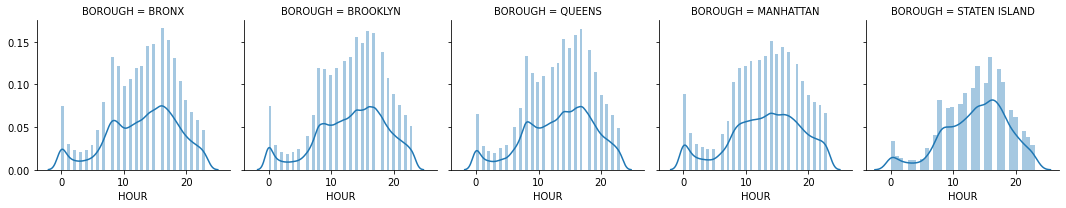

In [46]:
g=sns.FacetGrid(df,col="BOROUGH")
g.map(sns.distplot,"HOUR")

**¿Es mayor el número de accidentes en diferentes momentos en diferentes distritos? ¿Deberíamos concentrarnos en diferentes momentos para cada municipio?**

Se puede observar que el mayor número de accidentes se encuentra:
* En Bronx, desde las 16 a las 17 horas
* En Brooklyn, desde las 15 y luego en el periodo de las 17 a las 18 horas
* En Queens, a las 15 y en el periodo de las 16-17 horas
* En Manhattan, a las 14 horas y en el periodo de 16-17 horas
* En Staten Island, son 14, 16-17 horas.

### Exercise 9 (45 min):

¿Qué factores provocan la mayoría de los accidentes? Evite contar dos veces los factores que contribuyen a un solo accidente.

**Sugerencia:** Una forma de lidiar con las repeticiones es concatenar las columnas correspondientes conservando sus índices, puede hacerlo con las funciones ```pd.concat()``` y ```reset_index()```. Luego, use un ```group_by``` apropiado para contar el número de repeticiones de factores contribuidos por accidente.

**Answer**.


In [47]:
#Recordando el nombre de las columnas
list(df.columns)

['DATE',
 'TIME',
 'BOROUGH',
 'ZIP CODE',
 'LATITUDE',
 'LONGITUDE',
 'ON STREET NAME',
 'NUMBER OF PEDESTRIANS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST INJURED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED',
 'CONTRIBUTING FACTOR VEHICLE 1',
 'CONTRIBUTING FACTOR VEHICLE 2',
 'CONTRIBUTING FACTOR VEHICLE 3',
 'CONTRIBUTING FACTOR VEHICLE 4',
 'CONTRIBUTING FACTOR VEHICLE 5',
 'COLLISION_ID',
 'VEHICLE TYPE CODE 1',
 'VEHICLE TYPE CODE 2',
 'VEHICLE TYPE CODE 3',
 'VEHICLE TYPE CODE 4',
 'VEHICLE TYPE CODE 5',
 'HOUR',
 'WEEK']

In [48]:
causas=pd.concat([df['CONTRIBUTING FACTOR VEHICLE 1'],df['CONTRIBUTING FACTOR VEHICLE 2'],
                  df['CONTRIBUTING FACTOR VEHICLE 3'],df['CONTRIBUTING FACTOR VEHICLE 4']],axis=1)
causas

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4
0,Unspecified,NaN,NaN,NaN
1,Unspecified,NaN,NaN,NaN
2,Unspecified,NaN,NaN,NaN
3,Driver Inattention/Distraction,Unspecified,NaN,NaN
4,View Obstructed/Limited,Unspecified,NaN,NaN
...,...,...,...,...
238517,Driver Inattention/Distraction,Unspecified,NaN,NaN
238518,Pavement Slippery,NaN,NaN,NaN
238519,Unsafe Lane Changing,Unspecified,NaN,NaN
238520,Failure to Yield Right-of-Way,Unspecified,NaN,NaN


In [49]:
columns=causas.columns

In [50]:
causas['UNIQUE FACTORS'] =causas.apply(lambda x: set([x[column] for column in columns if x[column]]), axis=1)
factors_count = {}
for index, row in causas.iterrows():
    for factor in row['UNIQUE FACTORS']:
        count = factors_count.get(factor, 0)
        count += 1
        factors_count[factor] = count
factor_count = sorted(factors_count.items(), key=lambda x: x[1], reverse=True)

In [51]:
causas.head()

,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,UNIQUE FACTORS
0,Unspecified,NaN,NaN,NaN,"{nan, Unspecified}"
1,Unspecified,NaN,NaN,NaN,"{nan, Unspecified}"
2,Unspecified,NaN,NaN,NaN,"{nan, Unspecified}"
3,Driver Inattention/Distraction,Unspecified,NaN,NaN,"{nan, Driver Inattention/Distraction, Unspecif..."
4,View Obstructed/Limited,Unspecified,NaN,NaN,"{nan, View Obstructed/Limited, Unspecified}"


In [53]:
#freq_acc=causas['unique factors'].value_counts()
#freq_acc

Las mayores causas de accidentalidad son:
* {nan, Unspecified}     
* {nan, Driver Inattention/Distraction, Unspecified}   
* {nan, Driver Inattention/Distraction}
* {nan, Following Too Closely, Unspecified}
* {nan, Unspecified, Failure to Yield Right-of-Way}

In [54]:
causas[causas['CONTRIBUTING FACTOR VEHICLE 1']==causas['CONTRIBUTING FACTOR VEHICLE 2']].count()

CONTRIBUTING FACTOR VEHICLE 1    53768
CONTRIBUTING FACTOR VEHICLE 2    53768
CONTRIBUTING FACTOR VEHICLE 3     3011
CONTRIBUTING FACTOR VEHICLE 4      542
UNIQUE FACTORS                   53768
dtype: int64

### Por esta forma logré hacerlo pero sin borrar repetidos

In [55]:
causas2=pd.concat([df['CONTRIBUTING FACTOR VEHICLE 1'],df['CONTRIBUTING FACTOR VEHICLE 2'],
                  df['CONTRIBUTING FACTOR VEHICLE 3'],df['CONTRIBUTING FACTOR VEHICLE 4']])
causas2

0                            Unspecified
1                            Unspecified
2                            Unspecified
3         Driver Inattention/Distraction
4                View Obstructed/Limited
                       ...              
238517                               NaN
238518                               NaN
238519                               NaN
238520                               NaN
238521                               NaN
Length: 954088, dtype: object

In [56]:
causas2=causas2.dropna()
causas2=causas2.reset_index()
causas2.head()

,index,0
0,0,Unspecified
1,1,Unspecified
2,2,Unspecified
3,3,Driver Inattention/Distraction
4,4,View Obstructed/Limited


In [57]:
causas2.columns=['BORRAR', 'CAUSAS']
causas2

,BORRAR,CAUSAS
0,0,Unspecified
1,1,Unspecified
2,2,Unspecified
3,3,Driver Inattention/Distraction
4,4,View Obstructed/Limited
...,...,...
452075,237948,Unspecified
452076,238211,Unspecified
452077,238404,Unspecified
452078,238431,Unspecified


In [58]:
causas2.drop(['BORRAR'],axis=1,inplace=True)

In [59]:
causas2

,CAUSAS
0,Unspecified
1,Unspecified
2,Unspecified
3,Driver Inattention/Distraction
4,View Obstructed/Limited
...,...
452075,Unspecified
452076,Unspecified
452077,Unspecified
452078,Unspecified


In [60]:
freq=causas2.value_counts()
freq

CAUSAS                                               
Unspecified                                              239388
Driver Inattention/Distraction                            72203
Failure to Yield Right-of-Way                             20413
Following Too Closely                                     17908
Backing Unsafely                                          15068
Passing Too Closely                                       13378
Passing or Lane Usage Improper                            12953
Other Vehicular                                           11082
Unsafe Lane Changing                                       6986
Turning Improperly                                         6798
Traffic Control Disregarded                                5146
Driver Inexperience                                        4431
Unsafe Speed                                               3530
Reaction to Uninvolved Vehicle                             3189
View Obstructed/Limited                           

In [61]:
CFV1=df['CONTRIBUTING FACTOR VEHICLE 1']
causas1=pd.Series(CFV1.unique())
CFV2=df['CONTRIBUTING FACTOR VEHICLE 2']
causas2=pd.Series(CFV2.unique())
CFV3=df['CONTRIBUTING FACTOR VEHICLE 3']
causas3=pd.Series(CFV3.unique())
CFV4=df['CONTRIBUTING FACTOR VEHICLE 4']
causas4=pd.Series(CFV4.unique())
causas=pd.concat([causas1,causas2,causas3,causas4],axis=1)
causas.columns=['CAUSA 1', 'CAUSA 2', 'CAUSA 3', 'CAUSA 4']
causas.sample(5)


,CAUSA 1,CAUSA 2,CAUSA 3,CAUSA 4
1,Driver Inattention/Distraction,Unspecified,Unspecified,Unspecified
55,Windshield Inadequate,NaN,NaN,NaN
0,Unspecified,NaN,NaN,NaN
34,Pavement Slippery,Pavement Defective,NaN,NaN
29,Aggressive Driving/Road Rage,Headlights Defective,Passenger Distraction,NaN


La mayor causa de accidentalidad no está especificada, seguida por distracción del conductor

### Exercise 10 (45 min):

¿Qué tipos de vehículos están más involucrados en accidentes por municipio? Evite contar dos veces el tipo de vehículos presentes en un solo accidente.

**Sugerencia:** Puede aplicar un enfoque similar al utilizado en la pregunta anterior.

**Answer.** 

In [155]:
columns = ['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3',
           'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5']

# Concatenamos los dataframes por tipos de vehiculo
frames=[df[['BOROUGH',column]].rename(columns={'BOROUGH':'BOROUGH',column:'VEHICLE'}) for column in columns]
vehicles_df=pd.concat(frames).reset_index()
vehicles_df

,index,BOROUGH,VEHICLE
0,0,BRONX,Sedan
1,1,BROOKLYN,Sedan
2,2,QUEENS,Sedan
3,3,QUEENS,Bike
4,4,BRONX,Sedan
...,...,...,...
1192605,238517,QUEENS,NaN
1192606,238518,BRONX,NaN
1192607,238519,BRONX,NaN
1192608,238520,QUEENS,NaN


In [158]:
#Realizamos un vector de frequencias por cada municipio por cada tipo de vehiculo
no_rep_vehicles=vehicles_df.groupby(['index','BOROUGH','VEHICLE']).size().reset_index()
no_rep_vehicles

,index,BOROUGH,VEHICLE,0
0,0,BRONX,Sedan,1
1,1,BROOKLYN,Sedan,1
2,2,QUEENS,Sedan,1
3,3,QUEENS,Bike,1
4,3,QUEENS,Station Wagon/Sport Utility Vehicle,1
...,...,...,...,...
354071,238519,BRONX,PASSENGER VEHICLE,1
354072,238519,BRONX,SPORT UTILITY / STATION WAGON,1
354073,238520,QUEENS,PASSENGER VEHICLE,1
354074,238520,QUEENS,SPORT UTILITY / STATION WAGON,1


In [159]:
#Obtenemos el rid de estos
final_df=no_rep_vehicles.groupby(['BOROUGH','VEHICLE']).size().sort_values(ascending=False).reset_index()
final_df.sample(10)

,BOROUGH,VEHICLE,0
1356,MANHATTAN,Glass Rack,1
1065,STATEN ISLAND,garba,1
1138,QUEENS,const,1
559,QUEENS,BOX T,2
353,MANHATTAN,Ambul,7
311,BROOKLYN,MB,8
27,MANHATTAN,Bike,2060
870,BRONX,JOHND,1
358,MANHATTAN,TRK,6
1234,BROOKLYN,WAGON,1


In [164]:
final_df.groupby(['BOROUGH','VEHICLE']).max()

0
BOROUGH       VEHICLE    
BRONX         3-Door   25
              38AB-     1
              3D        3
              ACCES     2
              AM       42
...                    ..
STATEN ISLAND trail     3
              truck     1
              unkno     2
              usps      1
              van t     1

[1370 rows x 1 columns]

## De otra forma

In [148]:
#Primero, se crea un dataframe con los vehículos presentes en el accidente
vehiculo=pd.concat([df['BOROUGH'],df['VEHICLE TYPE CODE 1'],df['VEHICLE TYPE CODE 2'],
                  df['VEHICLE TYPE CODE 3'],df['VEHICLE TYPE CODE 4'],df['VEHICLE TYPE CODE 5']],axis=1)
vehiculo.head()

,BOROUGH,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,BRONX,Sedan,NaN,NaN,NaN,NaN
1,BROOKLYN,Sedan,NaN,NaN,NaN,NaN
2,QUEENS,Sedan,NaN,NaN,NaN,NaN
3,QUEENS,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,BRONX,Sedan,Sedan,NaN,NaN,NaN


In [151]:
carro_accidente=vehiculo.groupby('BOROUGH')

In [152]:
columns=vehiculo.columns
columns

Index(['BOROUGH', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [ ]:
for index,new_frame in carro_accidente:
    

In [64]:
vehiculo['accidentes'] =vehiculo.apply(lambda x: set([x[column] for column in columns if x[column]]), axis=1)
factors_count = {}
for index, row in vehiculo.iterrows():
    for factor in row['accidentes']:
        count = factors_count.get(factor, 0)
        count += 1
        factors_count[factor] = count
factor_count = sorted(factors_count.items(), key=lambda x: x[1], reverse=True)

In [67]:
freq_accidente=vehiculo['accidentes'].value_counts()
freq_accidente

TypeError: unhashable type: 'set'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'set'


{nan, Sedan}                                               50390
{nan, Sedan, Station Wagon/Sport Utility Vehicle}          43513
{nan, Station Wagon/Sport Utility Vehicle}                 36138
{nan, PASSENGER VEHICLE}                                   13928
{nan, PASSENGER VEHICLE, SPORT UTILITY / STATION WAGON}    10949
                                                           ...  
{nan, Sedan, dumps}                                            1
{nan, Armored Truck, Sedan, Flat Bed}                          1
{nan, anbul, Station Wagon/Sport Utility Vehicle}              1
{nan, mc}                                                      1
{nan, Pick-up Truck, LTRL}                                     1
Name: accidentes, Length: 2246, dtype: int64

Los vehículos más involucrados en accidentes son:
* {nan, Sedan}                                               50390
* {nan, Sedan, Station Wagon/Sport Utility Vehicle}          43513
* {nan, Station Wagon/Sport Utility Vehicle}                 36138
* {nan, PASSENGER VEHICLE}                                   13928
* {nan, PASSENGER VEHICLE, SPORT UTILITY / STATION WAGON}    10949

In [71]:
type(freq_accidente)

pandas.core.series.Series

In [72]:
vehiculo['Municipio']=df['BOROUGH']
vehiculo.head()

,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,accidentes,Municipio
0,Sedan,NaN,NaN,NaN,NaN,"{nan, Sedan}",BRONX
1,Sedan,NaN,NaN,NaN,NaN,"{nan, Sedan}",BROOKLYN
2,Sedan,NaN,NaN,NaN,NaN,"{nan, Sedan}",QUEENS
3,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,"{nan, Bike, Station Wagon/Sport Utility Vehicle}",QUEENS
4,Sedan,Sedan,NaN,NaN,NaN,"{nan, Sedan}",BRONX


In [131]:
import numpy as np
accidente_municipio= vehiculo[['Municipio','accidentes']]
accidente_municipio

,Municipio,accidentes
0,BRONX,"{nan, Sedan}"
1,BROOKLYN,"{nan, Sedan}"
2,QUEENS,"{nan, Sedan}"
3,QUEENS,"{nan, Bike, Station Wagon/Sport Utility Vehicle}"
4,BRONX,"{nan, Sedan}"
...,...,...
238517,QUEENS,"{nan, PASSENGER VEHICLE, SPORT UTILITY / STATI..."
238518,BRONX,"{nan, SPORT UTILITY / STATION WAGON}"
238519,BRONX,"{nan, PASSENGER VEHICLE, SPORT UTILITY / STATI..."
238520,QUEENS,"{nan, PASSENGER VEHICLE, SPORT UTILITY / STATI..."


Lo malo de esta forma, es que no logré que me contara por municipios T_T

### Exercise 11 (15 min):

En 2018 para una [entrevista](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) con The New York Times, el alcalde de Blasio de Nueva York declaró que *'Vision Zero está funcionando claramente'*. Ese año, el número de muertes en accidentes de tráfico en Nueva York se redujo a un histórico 202. Sin embargo, según lo informado por [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio- 1-30707464 /), el número de víctimas mortales ha aumentado un 30% en el primer trimestre de 2019 en comparación con el año anterior y el número de peatones y ciclistas heridos no ha experimentado ninguna mejora.

¿Cómo utilizaría los datos proporcionados para comprender qué salió mal en el primer trimestre de 2019?


> - [ ] Considere los accidentes del primer trimestre de 2019. Luego, busque las causas más comunes de accidentes en los que estuvieron involucrados peatones y ciclistas. Dé una recomendación basada únicamente en esta información.

> - [X] Cree un par de mapas de calor de los accidentes que involucraron a peatones y ciclistas lesionados / muertos en el primer trimestre de 2018 y 2019. Compare estos dos para ver si hay algún cambio en la concentración de accidentes. En áreas críticas, estudie el tipo de factores involucrados en los accidentes. Los datos mostraron los accidentes que involucraron vehículos lugares, pero no las causas de por qué se accidentaron de parte de peatones y ciclistas (vias inadecuadas, peatones escuchando música y no prestando atención). Es necesario estudiar a profundidad el problema   

> - [ ] Los datos proporcionados son insuficientes para mejorar nuestra comprensión de la situación.

> - [ ] Ninguna de las anteriores. 

**Answer.**


### Exercise 12 (45 min):

Calcula el número de muertes provocadas por cada tipo de vehículo. Trace un gráfico de barras para los 5 vehículos principales. ¿Qué vehículos están involucrados con mayor frecuencia en las muertes y cuánto más que los demás?

**Por ejemplo,** si dos personas murieron en un accidente en el que estuvieron involucrados 5 vehículos: 4 son VEHÍCULOS DE PASAJEROS y 1 es un VAGÓN DEPORTIVO / ESTACIÓN. Luego, agregaríamos dos muertes a cada tipo de VEHÍCULO DE PASAJEROS y VAGÓN DE ESTACIÓN / SERVICIO DEPORTIVO.

**Sugerencia:** Es posible que desee crear una nueva columna con el número total de muertes en el accidente. Para eso, puede encontrar útil la función ```.to_numpy()```. Luego, proceda como los ejercicios anteriores para evitar contabilizar dos veces el tipo de vehículos.

**Answer.**

In [91]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'HOUR', 'WEEK'],
      dtype='object')

In [129]:
ciclistas_dead=df['NUMBER OF CYCLIST KILLED']
peatones_dead=df['NUMBER OF PEDESTRIANS KILLED']
dead=df[['NUMBER OF CYCLIST KILLED','NUMBER OF PEDESTRIANS KILLED']]
dead['TOTAL KILLS']=df[['NUMBER OF CYCLIST KILLED','NUMBER OF PEDESTRIANS KILLED']].sum(axis=1)
dead.sample(10)

<ipython-input-129-06dd6c5dcb98>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead['TOTAL KILLS']=df[['NUMBER OF CYCLIST KILLED','NUMBER OF PEDESTRIANS KILLED']].sum(axis=1)


,NUMBER OF CYCLIST KILLED,NUMBER OF PEDESTRIANS KILLED,TOTAL KILLS
100897,0,0,0
46386,0,0,0
201790,0,0,0
10495,0,0,0
105556,0,0,0
34305,0,0,0
205107,0,0,0
58620,0,0,0
230954,0,0,0
167013,0,0,0


In [132]:
dead['ACCIDENTS']=vehiculo['accidentes']
dead.head(5)

<ipython-input-132-a1d435f3e8a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead['ACCIDENTS']=vehiculo['accidentes']


,NUMBER OF CYCLIST KILLED,NUMBER OF PEDESTRIANS KILLED,TOTAL KILLS,ACCIDENTS
0,0,0,0,"{nan, Sedan}"
1,0,0,0,"{nan, Sedan}"
2,0,0,0,"{nan, Sedan}"
3,0,0,0,"{nan, Bike, Station Wagon/Sport Utility Vehicle}"
4,0,0,0,"{nan, Sedan}"


In [137]:
muertos=dead.loc[dead['TOTAL KILLS']>0]
del muertos['NUMBER OF CYCLIST KILLED']
muertos

,NUMBER OF PEDESTRIANS KILLED,TOTAL KILLS,ACCIDENTS
127,0,1,"{nan, Box Truck, Bike}"
221,0,1,"{nan, Tractor Truck Diesel, Bike, Station Wago..."
4552,1,1,"{nan, Station Wagon/Sport Utility Vehicle}"
4959,0,1,"{nan, Box Truck, Bike}"
5933,1,1,"{nan, Sedan, Taxi}"
...,...,...,...
232932,1,1,"{nan, PASSENGER VEHICLE}"
234955,1,1,"{nan, PASSENGER VEHICLE}"
237780,1,1,"{nan, SPORT UTILITY / STATION WAGON}"
237867,1,1,"{nan, PASSENGER VEHICLE}"


In [145]:
muertos

,TOTAL KILLS,ACCIDENTS
127,1,"{nan, Box Truck, Bike}"
221,1,"{nan, Tractor Truck Diesel, Bike, Station Wago..."
4552,1,"{nan, Station Wagon/Sport Utility Vehicle}"
4959,1,"{nan, Box Truck, Bike}"
5933,1,"{nan, Sedan, Taxi}"
...,...,...
232932,1,"{nan, PASSENGER VEHICLE}"
234955,1,"{nan, PASSENGER VEHICLE}"
237780,1,"{nan, SPORT UTILITY / STATION WAGON}"
237867,1,"{nan, PASSENGER VEHICLE}"
